In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical as to_cat
import numpy as np ; import matplotlib.pyplot as plt
#import cv2,os 


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,28,28,1) / 255.0
x_test = x_test.reshape(10000,28,28,1) / 255.0

In [4]:
y_train  =  to_cat(y_train)
y_test = to_cat(y_test)

In [5]:



def test_model(optim="adam",last_activation="softmax",train_data=(x_train,y_train),validation_data=(x_test,y_test),epochs=5):
    (x_train,y_train) = train_data
    (x_test,y_test) = validation_data

    model = Sequential([

            Conv2D(32,(3,3),padding="same",input_shape=(28,28,1)),
            MaxPool2D(2,2),
            Flatten(),
            Dense(10,activation=last_activation)
        
    ])
    model.compile(loss='binary_crossentropy',optimizer=optim,metrics=['acc'])
    history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=32)
    return (history,optim,last_activation)

def save_plottings(data):
    (history,optim,last_activation) =  data 
    fig, ax = plt.subplots(1,2)
    ## Accuracy
    plt.style.use("ggplot")
    ax[0].plot(history.history['acc'])
    ax[0].plot(history.history['val_acc'])
    ax[0].legend(["train","val"],loc='upper left')
    extent1 = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"{optim}/{last_activation}_ACC.png", bbox_inches=extent1.expanded(1.1, 1.2))


    ## Loss
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].legend(["train", "val"],loc='upper left')
    extent2 = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"{optim}/{last_activation}_LOSS.png", bbox_inches=extent2.expanded(1.1, 1.2))
    
    
    

### SOFTMAX 

In [6]:
data = test_model(optim="adam",last_activation="softmax")
save_plottings(data)




Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0645 - acc: 0.9169 - val_loss: 0.0360 - val_acc: 0.9568
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0305 - acc: 0.9650 - val_loss: 0.0270 - val_acc: 0.9682
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0234 - acc: 0.9738 - val_loss: 0.0220 - val_acc: 0.9734
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0199 - acc: 0.9785 - val_loss: 0.0201 - val_acc: 0.9752
Epoch 5/5
 249/1875 [==>...........................] - ETA: 7s - loss: 0.0163 - acc: 0.9838

KeyboardInterrupt: 

C:\codes\machineL\CODING\Image\Pkgs_Image\mediaPipe_ENV\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - acc: 0.5109 - loss: 0.3394 - val_acc: 0.8472 - val_loss: 0.1453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - acc: 0.8428 - loss: 0.1312 - val_acc: 0.8760 - val_loss: 0.0989
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - acc: 0.8717 - loss: 0.0979 - val_acc: 0.8899 - val_loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - acc: 0.8812 - loss: 0.0879 - val_acc: 0.8963 - val_loss: 0.0794
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - acc: 0.8884 - loss: 0.0821 - val_acc: 0.9014 - val_loss: 0.0753


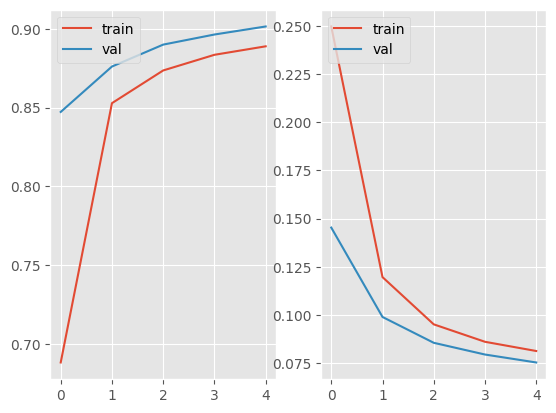

In [42]:
data = test_model(optim="sgd",last_activation="softmax")
save_plottings(data)

C:\codes\machineL\CODING\Image\Pkgs_Image\mediaPipe_ENV\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.8578 - loss: 0.1013 - val_acc: 0.9532 - val_loss: 0.0398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - acc: 0.9561 - loss: 0.0368 - val_acc: 0.9688 - val_loss: 0.0267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - acc: 0.9707 - loss: 0.0261 - val_acc: 0.9741 - val_loss: 0.0227
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - acc: 0.9759 - loss: 0.0224 - val_acc: 0.9769 - val_loss: 0.0211
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - acc: 0.9782 - loss: 0.0201 - val_acc: 0.9763 - val_loss: 0.0202


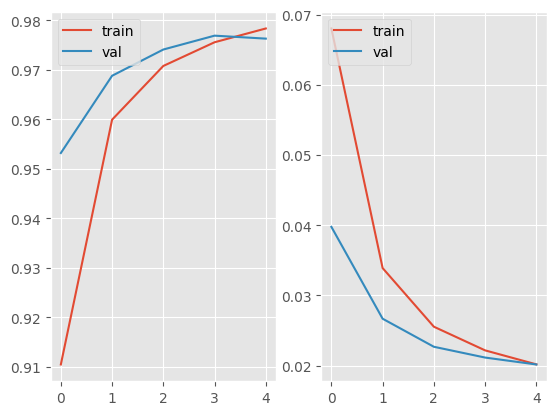

In [43]:
data = test_model(optim="rmsprop",last_activation="softmax")
save_plottings(data)

### SIGMOID 

C:\codes\machineL\CODING\Image\Pkgs_Image\mediaPipe_ENV\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - acc: 0.8449 - loss: 0.1095 - val_acc: 0.9564 - val_loss: 0.0361
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - acc: 0.9625 - loss: 0.0331 - val_acc: 0.9692 - val_loss: 0.0270
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - acc: 0.9723 - loss: 0.0249 - val_acc: 0.9731 - val_loss: 0.0230
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - acc: 0.9779 - loss: 0.0202 - val_acc: 0.9769 - val_loss: 0.0200
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - acc: 0.9797 - loss: 0.0181 - val_acc: 0.9763 - val_loss: 0.0203


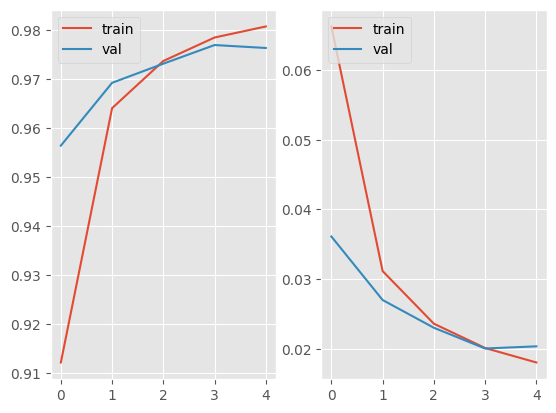

In [44]:
data = test_model(optim="adam",last_activation="sigmoid")
save_plottings(data)

C:\codes\machineL\CODING\Image\Pkgs_Image\mediaPipe_ENV\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - acc: 0.8576 - loss: 0.1016 - val_acc: 0.9517 - val_loss: 0.0401
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - acc: 0.9564 - loss: 0.0366 - val_acc: 0.9704 - val_loss: 0.0266
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - acc: 0.9700 - loss: 0.0260 - val_acc: 0.9733 - val_loss: 0.0234
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - acc: 0.9769 - loss: 0.0217 - val_acc: 0.9766 - val_loss: 0.0205
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - acc: 0.9783 - loss: 0.0202 - val_acc: 0.9764 - val_loss: 0.0199


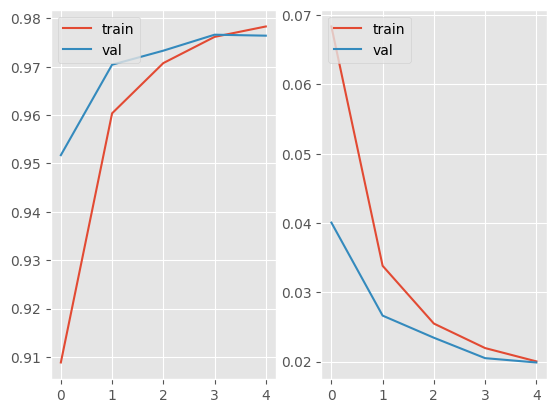

In [45]:
data = test_model(optim="rmsprop",last_activation="sigmoid")
save_plottings(data)

C:\codes\machineL\CODING\Image\Pkgs_Image\mediaPipe_ENV\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.5308 - loss: 0.3250 - val_acc: 0.8397 - val_loss: 0.1402
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - acc: 0.8416 - loss: 0.1280 - val_acc: 0.8733 - val_loss: 0.0983
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - acc: 0.8706 - loss: 0.0981 - val_acc: 0.8900 - val_loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - acc: 0.8826 - loss: 0.0873 - val_acc: 0.8977 - val_loss: 0.0791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - acc: 0.8884 - loss: 0.0826 - val_acc: 0.9007 - val_loss: 0.0753


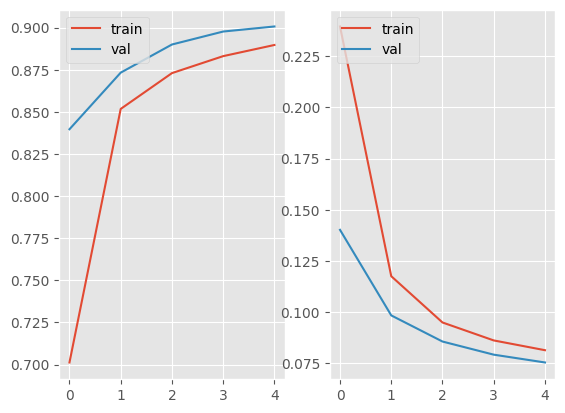

In [46]:
data = test_model(optim="sgd",last_activation="sigmoid")
save_plottings(data)

In [47]:
## SOFTMAX
### ADAM :  97% SGD :  90%  RMSPROP :  97%
## SIGMOID
### ADAM :  97% SGD :  90%  RMSPROP :   97%